<a href="https://colab.research.google.com/github/koyomin9zx/CS114.K21-Machine-Learning/blob/master/Report_Case_Study_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Báo Cáo Case Study 1: Sacarsm detection** 
---
***Sinh viên thực hiện***:
*   Nguyễn Đình Vinh - 16521582
*   Phan Đăng Lâm - 16521710
---
***Bài toán***:
Phát hiện tiêu đề của một bài báo có mang tính châm biếm, mỉa mai hay không. 


***Dữ liệu***: Dữ liệu được thu thập từ 2 website là [TheOnion](https://www.theonion.com/) và [Huffpost](https://www.huffpost.com/) trong đó :

*   Dữ liệu từ trang [TheOnion](https://www.theonion.com/) là dữ liệu mang tính châm biếm, được thu thập từ thể loại tin tóm tắt và thể loại tin hình ảnh

*   Dữ liệu từ trang [Huffpost](https://www.huffpost.com/) là dữ liệu thật, không mang tính châm biếm 





# **Tiền xử lý dữ liệu**

In [1]:
#cài đặt các lib cần thiết
from google.colab import files
!pip install -q kaggle

In [2]:
#sử dụng kagle API để download dataset
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [3]:
#lấy data từ kaggle nhập sang colab
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d rmisra/news-headlines-dataset-for-sarcasm-detection

  0% 0.00/3.30M [00:00<?, ?B/s]
100% 3.30M/3.30M [00:00<00:00, 110MB/s]


In [4]:
#unzip dataset
!unzip /content/news-headlines-dataset-for-sarcasm-detection.zip

Archive:  /content/news-headlines-dataset-for-sarcasm-detection.zip
  inflating: Sarcasm_Headlines_Dataset.json  
  inflating: Sarcasm_Headlines_Dataset_v2.json  


In [5]:
#đọc dataset vào data frame
import pandas as pd
df = pd.read_json("/content/Sarcasm_Headlines_Dataset_v2.json", lines=True)
df.head(5)

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


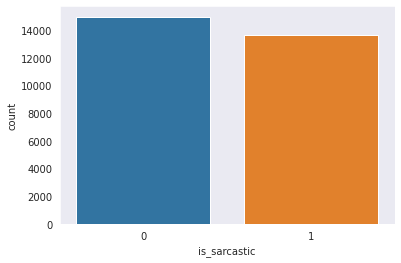

In [6]:
#visualize dữ liệu
import seaborn as sns
sns.set_style("dark")
sns.countplot(df.is_sarcastic	)

In [ ]:
#xem thử 20 headlines đầu tiên nó thư thế nào
for i,headline in enumerate (df['headline'], 1):
    if i > 20:
        break
    else:
        print(i, headline)

1 thirtysomething scientists unveil doomsday clock of hair loss
2 dem rep. totally nails why congress is falling short on gender, racial equality
3 eat your veggies: 9 deliciously different recipes
4 inclement weather prevents liar from getting to work
5 mother comes pretty close to using word 'streaming' correctly
6 my white inheritance
7 5 ways to file your taxes with less stress
8 richard branson's global-warming donation nearly as much as cost of failed balloon trips
9 shadow government getting too large to meet in marriott conference room b
10 lots of parents know this scenario
11 this lesbian is considered a father in indiana (and an amazing one at that)
12 amanda peet told her daughter sex is 'a special hug'
13 what to know regarding current treatments for ebola
14 chris christie suggests hillary clinton was to blame for boko haram's kidnapping of hundreds of schoolgirls
15 ford develops new suv that runs purely on gasoline
16 uber ceo travis kalanick stepping down from trump ec

***Lọc nhiễu cho dữ liệu (loại bỏ kí tự đặc biệt, chữ số)***

In [7]:
import string
from string import digits, punctuation

hl_cleansed = []
for hl in df['headline']:
    #Xóa kí tự đặc biệt
    clean = hl.translate(str.maketrans('', '', punctuation))
    #Xóa số
    clean = clean.translate(str.maketrans('', '', digits))
    hl_cleansed.append(clean)
    
#Xem sự thay đổi
print('Original texts :')
print(df['headline'][2])
print('\nAfter cleansed :')
print(hl_cleansed[2])

Original texts :
eat your veggies: 9 deliciously different recipes

After cleansed :
eat your veggies  deliciously different recipes


***Tokenization (tách từ) ***

In [8]:
hl_tokens = []
for hl in hl_cleansed:
    hl_tokens.append(hl.split())

# Xem sự thay đổi
print('Before tokenization :')
print(hl_cleansed[100])
print('\nAfter tokenization :')
print(hl_tokens[100])

Before tokenization :
report  of trump endorsements made after staring at bedroom ceiling for  hours

After tokenization :
['report', 'of', 'trump', 'endorsements', 'made', 'after', 'staring', 'at', 'bedroom', 'ceiling', 'for', 'hours']


***Lemmatization (chuẩn hóa từ về dạng nguyên mẫu)***

In [9]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

# khởi tạo Lemmatizer
lemmatizer = WordNetLemmatizer()

hl_lemmatized = []
for tokens in hl_tokens:
    lemm = [lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in tokens]
    hl_lemmatized.append(lemm)
    
# xem sự thay đổi
word_1 = ['skyrim','dragons', 'are', 'having', 'parties']
word_2 = [lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in word_1]
print('Before lemmatization :\t',word_1)
print('After lemmatization :\t',word_2)

Before lemmatization :	 ['skyrim', 'dragons', 'are', 'having', 'parties']
After lemmatization :	 ['skyrim', 'dragon', 'be', 'have', 'party']


# ***Feature Engineering và Training với RNN***

Sử dụng pp count vectorize để tiến hành word embedding

In [11]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.preprocessing.sequence import pad_sequences
import numpy as np

# Sử dụng top 2000 từ làm tập từ vựng 
max_features = 2000

#tìm ra input có kích thước lớn nhất
max_token = len(max(hl_lemmatized))

#khởi tạo tokenizer
tokenizer = Tokenizer(num_words=max_features)

#word embedding
tokenizer.fit_on_texts(hl_lemmatized)
sequences = tokenizer.texts_to_sequences(hl_lemmatized)

#padding zero để cùng có 1 kích thước input
X = pad_sequences(sequences, maxlen=max_token)

Using TensorFlow backend.


Split Train, test

In [12]:
from sklearn.model_selection import train_test_split

Y = df['is_sarcastic'].values
Y = np.vstack(Y)
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3, random_state = 42)

Building the Model

In [13]:
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding, BatchNormalization
from keras.optimizers import RMSprop, Adam
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.backend import clear_session

clear_session()
embed_dim = 64

model = Sequential()
model.add(Embedding(max_features, embed_dim,input_length = max_token))
model.add(LSTM(96, dropout=0.2, recurrent_dropout=0.2, activation='relu'))
model.add(Dense(150))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer=Adam(1e-4),metrics = ['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 14, 64)            128000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 96)                61824     
_________________________________________________________________
dense_1 (Dense)              (None, 150)               14550     
_________________________________________________________________
batch_normalization_1 (Batch (None, 150)               600       
_________________________________________________________________
dropout_1 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 151       
_________________________________________________________________
activation_1 (Activation)    (None, 1)                

Training process

In [14]:
epoch = 10
batch_size = 32
history=model.fit(X_train, Y_train, epochs = epoch, batch_size=batch_size, verbose = 1, validation_split=0.2)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 16026 samples, validate on 4007 samples
Epoch 1/10
16026/16026 [==============================] - 33s 2ms/step - loss: 0.6080 - accuracy: 0.6612 - val_loss: 0.5723 - val_accuracy: 0.7672
Epoch 2/10
16026/16026 [==============================] - 31s 2ms/step - loss: 0.4589 - accuracy: 0.7848 - val_loss: 0.4213 - val_accuracy: 0.8101
Epoch 3/10
16026/16026 [==============================] - 30s 2ms/step - loss: 0.3942 - accuracy: 0.8199 - val_loss: 0.4003 - val_accuracy: 0.8251
Epoch 4/10
16026/16026 [==============================] - 30s 2ms/step - loss: 0.3666 - accuracy: 0.8381 - val_loss: 0.3896 - val_accuracy: 0.8266
Epoch 5/10
16026/16026 [==============================] - 31s 2ms/step - loss: 0.3483 - accuracy: 0.8467 - val_loss: 0.3884 - val_accuracy: 0.8248
Epoch 6/10
16026/16026 [==============================] - 31s 2ms/step - loss: 0.3323 - accuracy: 0.8581 - val_loss: 0.3840 - val_accuracy: 0.8290
Epoch 7/10
16026/16026 [==============================] - 30s 2ms/ste

 ***Model Evaluation***

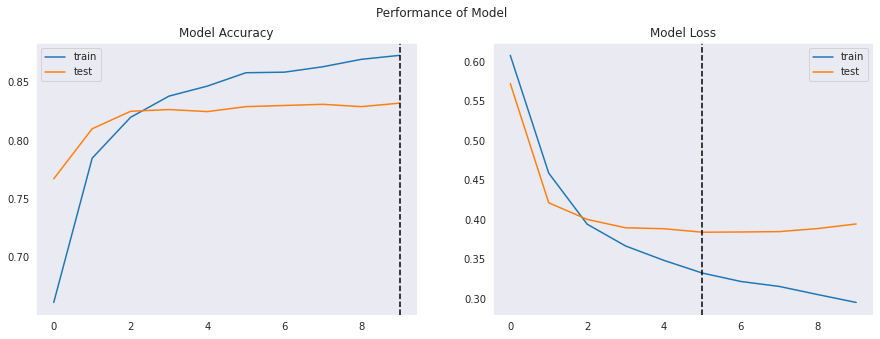

In [15]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))
fig.suptitle("Performance of Model")
ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
vline_cut = np.where(history.history['val_accuracy'] == np.max(history.history['val_accuracy']))[0][0]
ax1.axvline(x=vline_cut, color='k', linestyle='--')
ax1.set_title("Model Accuracy")
ax1.legend(['train', 'test'])

ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
vline_cut = np.where(history.history['val_loss'] == np.min(history.history['val_loss']))[0][0]
ax2.axvline(x=vline_cut, color='k', linestyle='--')
ax2.set_title("Model Loss")
ax2.legend(['train', 'test'])
plt.show()

***Plot confusion matrix***

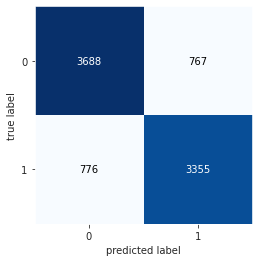

In [16]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

pred=np.around(model.predict(X_test))
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(Y_test,pred))
plt.show()

In [17]:
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      4455
           1       0.81      0.81      0.81      4131

    accuracy                           0.82      8586
   macro avg       0.82      0.82      0.82      8586
weighted avg       0.82      0.82      0.82      8586



# **Feature Engineering và Training với thuật toán SVM và NaiveBayes**

thêm thư viện cần thiết

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt


chia train test

In [19]:
X = [" ".join(x) for x in hl_lemmatized]
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X,df['is_sarcastic'],test_size=0.3)

Sử dụng TF-IDF để tiến hành word embedding

In [20]:
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(X)
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

## ***Trainning với SVM***

In [21]:
SVM = svm.SVC(C=1.0, kernel='linear', verbose=True)
SVM.fit(Train_X_Tfidf,Train_Y)

[LibSVM]

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=True)

Plot confusion matrix

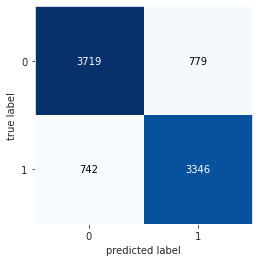

In [22]:
predictions_SVM=SVM.predict(Test_X_Tfidf)
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(Test_Y,predictions_SVM))
plt.show()

In [23]:
print(classification_report(Test_Y,predictions_SVM))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      4498
           1       0.81      0.82      0.81      4088

    accuracy                           0.82      8586
   macro avg       0.82      0.82      0.82      8586
weighted avg       0.82      0.82      0.82      8586



## ***Trainning với Naive Bayes***

In [24]:
Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X_Tfidf,Train_Y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

Plot confution matrix

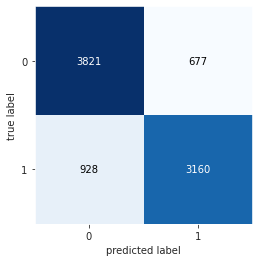

In [25]:
predictions_NB=Naive.predict(Test_X_Tfidf)
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(Test_Y,predictions_NB))
plt.show()

In [26]:
print(classification_report(Test_Y,predictions_NB))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83      4498
           1       0.82      0.77      0.80      4088

    accuracy                           0.81      8586
   macro avg       0.81      0.81      0.81      8586
weighted avg       0.81      0.81      0.81      8586



# **Thu thập 2000 headlines mới từ trang TheOnion và Huffpost để đánh giá performance của các model**

Về dữ liệu thu thập thì chúng em sử dụng axios 1 package của javascript để crawl dữ liệu



*   Đối với trang TheOnion: dùng axios để request đến trang onion, sau đó lọc element để lấy headline và link

*   Đối với trang Huffpost: Có sẵn API nên chỉ cần dùng axios request tới api đó là thu được



link project github dùng exios để crawl: https://github.com/dlphan/crawl-data

In [ ]:
!git clone https://github.com/dlphan/crawl-data

## Load dữ liệu vào dataframe

In [36]:
import json

with open('/content/crawl-data/theonion/data/onion.json') as f:
   data_onion = json.load(f)

with open('/content/crawl-data/huffpost/data/huffpost.json') as f:
   data_huffpost = json.load(f)

df_onion=pd.DataFrame(data_onion)

#dữ liệu trang onion crawl nhiều quá nên chỉ lấy 1250 row
df_onion=df_onion.loc[0:1250,:]
df_huffpost=pd.DataFrame(data_huffpost)


#gộp chung dataframe dữ liệu trang onion và huffpost làm 1 và xáo trộn
df = pd.concat([df_onion,df_huffpost], axis=0, ignore_index=True)
df = df.sample(frac=1, axis=1).sample(frac=1).reset_index(drop=True)
df.dropna()
df.head(10)

,headline,article_link,is_sarcastic
0,Portland Police Chief Resigns Amid Anti-Racism...,https://www.huffpost.com/entry/portland-police...,0
1,Boy Scouts File For Bankruptcy,https://www.theonion.com/department-of-evil-al...,1
2,Bolton Claims Trump Encouraged Xi To Build 'Co...,https://www.huffpost.com/entry/bolton-book-tru...,0
3,Highlights Of ‘Tiger King’,https://www.theonion.com/damning-report-finds-...,1
4,CNN Reminds Debate Participants To Keep Person...,https://politics.theonion.com/fox-news-condemn...,1
5,New LinkedIn Feature Lets Job-Seekers Add Most...,https://www.theonion.com/the-week-in-pictures-...,1
6,"With Trump MIA, Senate Republicans Go It Alone...",https://www.huffpost.com/entry/george-floyd-po...,0
7,Ilhan Omar Isn't Done Fighting,https://www.huffpost.com/entry/ilhan-omar-isnt...,0
8,Trump On Police Chokeholds: 'Concept' Is 'Inno...,https://www.huffpost.com/entry/trump-fox-news-...,0
9,Longtime Person Dead At 86,https://www.theonion.com/one-flu-over-the-cuck...,1


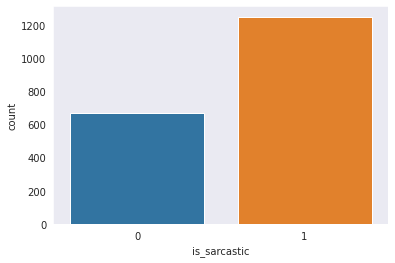

In [30]:
#visualize tập test

sns.set_style("dark")
sns.countplot(df.is_sarcastic)

## Làm sạch dữ liệu 

In [38]:
hl_cleansed = []
for hl in df['headline']:
    #Xóa kí tự đặc biệt
    clean = hl.translate(str.maketrans('', '', punctuation))
    #Xóa số
    clean = clean.translate(str.maketrans('', '', digits))
    hl_cleansed.append(clean)

hl_tokens = []
for hl in hl_cleansed:
    hl_tokens.append(hl.split())

# khởi tạo Lemmatizer
lemmatizer = WordNetLemmatizer()

hl_lemmatized = []
for tokens in hl_tokens:
    lemm = [lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in tokens]
    hl_lemmatized.append(lemm)

## Tiến hành word embedding và predict

### w_emb cho đầu vào mô hình RNN và predict

In [39]:
sequences_test = tokenizer.texts_to_sequences(hl_lemmatized)
#padding zero để cùng có 1 kích thước input
X = pad_sequences(sequences_test, maxlen=max_token)
Y = df['is_sarcastic'].values
Y = np.vstack(Y)

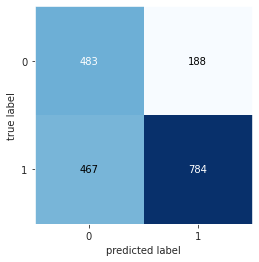

In [40]:
pred=np.around(model.predict(X))
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(Y,pred))
plt.show()

In [41]:
print(classification_report(Y,pred))

              precision    recall  f1-score   support

           0       0.51      0.72      0.60       671
           1       0.81      0.63      0.71      1251

    accuracy                           0.66      1922
   macro avg       0.66      0.67      0.65      1922
weighted avg       0.70      0.66      0.67      1922



### w_emb cho đầu vào mô hình SVM và predict

In [43]:
X = [" ".join(x) for x in hl_lemmatized]
Y=df['is_sarcastic']
X = Tfidf_vect.transform(X)

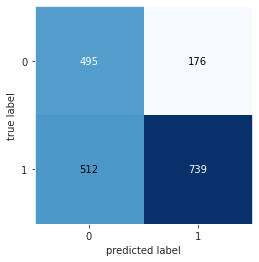

In [45]:
pred=np.around(SVM.predict(X))
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(Y,pred))
plt.show()

In [46]:
print(classification_report(Y,pred))

              precision    recall  f1-score   support

           0       0.49      0.74      0.59       671
           1       0.81      0.59      0.68      1251

    accuracy                           0.64      1922
   macro avg       0.65      0.66      0.64      1922
weighted avg       0.70      0.64      0.65      1922



**Có khả năng là dữ liệu mới crawl về tại thời điểm hiện tại có cách viết khác với dữ liệu gốc nên performance bị giảm so với tập test trên tập dữ liệu gốc**

### w_emb cho đầu vào mô hình NB và predict 

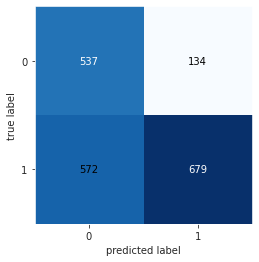

In [48]:
pred=np.around(Naive.predict(X))
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(Y,pred))
plt.show()

In [49]:
print(classification_report(Y,pred))

              precision    recall  f1-score   support

           0       0.48      0.80      0.60       671
           1       0.84      0.54      0.66      1251

    accuracy                           0.63      1922
   macro avg       0.66      0.67      0.63      1922
weighted avg       0.71      0.63      0.64      1922



## RÚT RA NHẬN XÉT: Khi test trên gần 2000 headlines mới này thì accuracy của các mô hình trên đều giảm 20%. Có khả năng là do văn phong cách viết của các tiêu đề mới này khác với tiêu đề cũ trong tập data gốc. 

# **Lưu các model đã train và tiến hành predict thử 1 số headlines nhập vào**

In [ ]:
#lưu model
import joblib

joblib.dump(Tfidf_vect, '/content/model/tfidf_w_embedding.pkl')
joblib.dump(tokenizer, '/content/model/rnn_w_embedding.pkl')
joblib.dump(model, '/content/model/rnn_model.pkl')
joblib.dump(SVM, '/content/model/svm_model.pkl')
joblib.dump(Naive, '/content/model/nb_model.pkl')
joblib.dump(max_token, '/content/model/rnn_max_token.pkl')

**reset runtime và test**

In [ ]:
#thêm các thư viện
from nltk.corpus import wordnet,stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import classification_report,confusion_matrix
import re
import string
from string import digits, punctuation
import pandas as pd
import joblib
import nltk
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.preprocessing.sequence import pad_sequences
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
#load lại model và các thông số cần thiết
max_token=joblib.load('model/rnn_max_token.pkl')
rnn_model=joblib.load('model/rnn_model.pkl')
rnn_w_embedding=joblib.load('model/rnn_w_embedding.pkl')
svm_model=joblib.load('model/svm_model.pkl')
nb_model=joblib.load('model/nb_model.pkl')
tfidf_w_embedding=joblib.load('model/tfidf_w_embedding.pkl')

**cài đặt các hàm cần thiết để xử lý đầu vào và dự đoán kết quả**

In [ ]:
def text_cleansing(text):
  #Xóa kí tự đặc biệt
  text = text.translate(str.maketrans('', '', punctuation))
  #Xóa số
  text = text.translate(str.maketrans('', '', digits))
  return text.strip()

def text_tokenizer(text):
  return text.split()   

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

def word_lemmatizer(list_token):
  # khởi tạo Lemmatizer
  lemmatizer = WordNetLemmatizer()
  return [lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in list_token]

def rnn_predict(text):
  print('Headline: ',text,'\n')
  text=text_cleansing(text)
  w_lemma=[word_lemmatizer(text.split())]
  sequences = rnn_w_embedding.texts_to_sequences(w_lemma)
  X = pad_sequences(sequences, maxlen=max_token)
  if np.around(rnn_model.predict(X)[0])==1:
    print("RNN predict =============> sarcastic\n\n")
  else:
    print("RNN predict =============> non-sarcastic\n\n")

def svm_predict(text):
  print('Headline: ',text,'\n')
  text=text_cleansing(text)
  w_lemma=[word_lemmatizer(text.split())]
  w_lemma=[" ".join(x) for x in w_lemma]
  X_Tfidf = tfidf_w_embedding.transform(w_lemma)
  if np.around(svm_model.predict(X_Tfidf)[0])==1:
    print("SVM predict =============> sarcastic\n\n")
  else:
    print("SVM predict =============> non-sarcastic\n\n")

def nb_predict(text):
  print('Headline: ',text,'\n')
  text=text_cleansing(text)
  w_lemma=[word_lemmatizer(text.split())]
  w_lemma=[" ".join(x) for x in w_lemma]
  X_Tfidf = tfidf_w_embedding.transform(w_lemma)
  if np.around(nb_model.predict(X_Tfidf)[0])==1:
    print("NB predict =============> sarcastic\n\n")
  else:
    print("NB predict =============> non-sarcastic\n\n")

**Tiến hành dự đoán**

In [ ]:
rnn_predict('Jilted Lover Keying Cheater’s Car Realizes She Should Have Started Further Over')
svm_predict('Jilted Lover Keying Cheater’s Car Realizes She Should Have Started Further Over')
nb_predict('Jilted Lover Keying Cheater’s Car Realizes She Should Have Started Further Over')

Headline:  Jilted Lover Keying Cheater’s Car Realizes She Should Have Started Further Over 

RNN predict =============> sarcastic


Headline:  Jilted Lover Keying Cheater’s Car Realizes She Should Have Started Further Over 

SVM predict =============> sarcastic


Headline:  Jilted Lover Keying Cheater’s Car Realizes She Should Have Started Further Over 

NB predict =============> sarcastic




In [ ]:
rnn_predict('Officials Warn Defunding Police Could Lead To Spike In Crime From Ex-Officers With No Outlet For Violence')
svm_predict('Officials Warn Defunding Police Could Lead To Spike In Crime From Ex-Officers With No Outlet For Violence')
nb_predict('Officials Warn Defunding Police Could Lead To Spike In Crime From Ex-Officers With No Outlet For Violence')

Headline:  Officials Warn Defunding Police Could Lead To Spike In Crime From Ex-Officers With No Outlet For Violence 

RNN predict =============> sarcastic


Headline:  Officials Warn Defunding Police Could Lead To Spike In Crime From Ex-Officers With No Outlet For Violence 

SVM predict =============> non-sarcastic


Headline:  Officials Warn Defunding Police Could Lead To Spike In Crime From Ex-Officers With No Outlet For Violence 

NB predict =============> non-sarcastic




In [ ]:
rnn_predict('Jack Abramoff, The Face Of Corrupt Lobbying, Charged In Yet Another Lobbying Scheme')
svm_predict('Jack Abramoff, The Face Of Corrupt Lobbying, Charged In Yet Another Lobbying Scheme')
nb_predict('Jack Abramoff, The Face Of Corrupt Lobbying, Charged In Yet Another Lobbying Scheme')

Headline:  Jack Abramoff, The Face Of Corrupt Lobbying, Charged In Yet Another Lobbying Scheme 

RNN predict =============> non-sarcastic


Headline:  Jack Abramoff, The Face Of Corrupt Lobbying, Charged In Yet Another Lobbying Scheme 

SVM predict =============> non-sarcastic


Headline:  Jack Abramoff, The Face Of Corrupt Lobbying, Charged In Yet Another Lobbying Scheme 

NB predict =============> non-sarcastic




In [ ]:
rnn_predict('Trump Has Dismantled More Monuments Than Any Protest')
svm_predict('Trump Has Dismantled More Monuments Than Any Protest')
nb_predict('Trump Has Dismantled More Monuments Than Any Protest')

Headline:  Trump Has Dismantled More Monuments Than Any Protest 

RNN predict =============> non-sarcastic


Headline:  Trump Has Dismantled More Monuments Than Any Protest 

SVM predict =============> non-sarcastic


Headline:  Trump Has Dismantled More Monuments Than Any Protest 

NB predict =============> non-sarcastic


